## 120 - Inset Axes with RADAR data


[Youtube](https://www.youtube.com/watch?v=CD3rH68Op70)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from metpy.cbook import get_test_data
from metpy.io import Level3File
from metpy.plots import colortables

In [2]:
# Open the file
name = get_test_data('nids/KOUN_SDUS54_N0QTLX_201305202016', as_file_obj = False)
f = Level3File(name)

# Pull the data out of the file object
datadict = f.sym_block[0][0]

# Turn into an array, then mask
data = np.ma.array(datadict['data'])
data[data == 0] = np.ma.masked

# Grab azimuths and calculate a range based on number of gates
az = np.array(datadict['start_az'] + [datadict['end_az'][-1]])
rng = np.linspace(0, f.max_range, data.shape[-1] + 1)

# Convert az, range to x, y
xlocs = rng * np.sin(np.deg2rad(az[:, np.newaxis]))
ylocs = rng * np.cos(np.deg2rad(az[:, np.newaxis]))

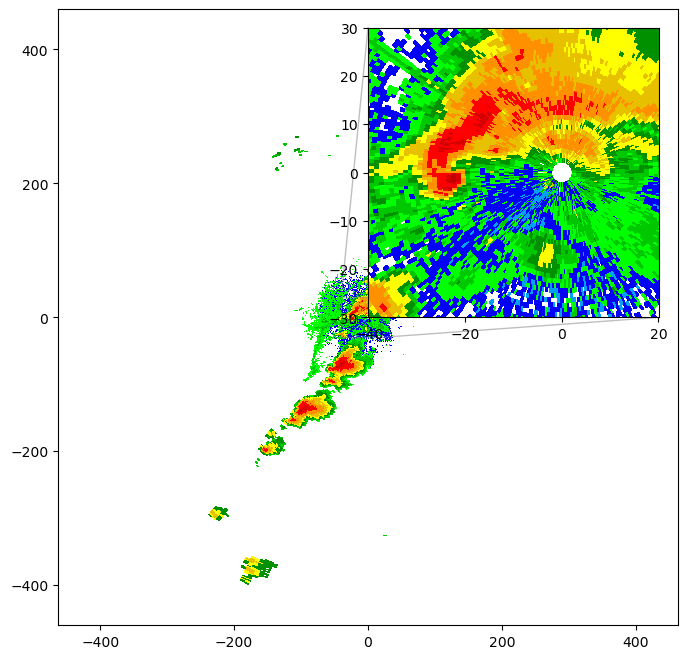

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

norm, cmap = colortables.get_with_steps('NWSReflectivity', 16, 16)

ax.pcolormesh(xlocs, ylocs, data, norm = norm, cmap = cmap)
ax.set_aspect('equal', 'datalim')

axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.pcolormesh(xlocs, ylocs, data, norm = norm, cmap = cmap)
axins.set_aspect('equal', 'datalim')

axins.set_xlim(-40, 20)
axins.set_ylim(-30, 30)

_ = ax.indicate_inset_zoom(axins)